In this assignment our work will be consist of two parts: patient data analisys, cohort data analisys.

In patient data we usually look for particular genomic alterations (found out in cohort study). It can help us to find cause of cancer and in some cases choose special treatment for this type of cancer.

What is cohort?

Cohort -> a group of individuals who share a common trait, such as smoking status.

Cohort study -> a research study that compares a particular outcome (such as lung cancer) in groups of individuals who are alike in many ways but differ by a certain characteristic (for example, female nurses who smoke compared with those who do not smoke).

Cohort studies are better able to approach an estimation of causality. Analysis of qualitatively collected cohort data can tell us about the development of the tumor process in a particular cancer diagnosis.

In this type of study we divide patients by molecular subtype of their tumors, by age, sex, ethnicity, treatment conditions and assign survival or treatment efficiency.

# Imports

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting

In [ ]:
%config InlineBackend.figure_format = 'png'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300

sns.set_style('white')

# Data & Tasks

In [ ]:
# download and unpack data from cBioPortal
!wget https://cbioportal-datahub.s3.amazonaws.com/luad_cptac_2020.tar.gz
!tar -xf luad_cptac_2020.tar.gz

--2024-02-26 21:01:14--  https://cbioportal-datahub.s3.amazonaws.com/luad_cptac_2020.tar.gz
Resolving cbioportal-datahub.s3.amazonaws.com (cbioportal-datahub.s3.amazonaws.com)... 16.182.97.145, 52.217.136.89, 52.217.166.241, ...
Connecting to cbioportal-datahub.s3.amazonaws.com (cbioportal-datahub.s3.amazonaws.com)|16.182.97.145|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45542958 (43M) [application/x-tar]
Saving to: ‘luad_cptac_2020.tar.gz’

luad_cptac_2020.tar 100%[===================>]  43.43M  22.8MB/s    in 1.9s    

2024-02-26 21:01:16 (22.8 MB/s) - ‘luad_cptac_2020.tar.gz’ saved [45542958/45542958]



cBioPortal is an interactive, web-based application for cohort analysis or molecular and clinical data review.
In this homework you are going to work with data from [CPTAC](https://proteomics.cancer.gov/programs/cptac#:~:text=The%20National%20Cancer%20Institute's%20Clinical,and%20genome%20analysis%2C%20or%20proteogenomics) study.

This cohort consists of patients with lung adenocarcinoma. To work with it you should keep in mind molecular features of this diagnosis.

[Link](https://www.cell.com/cell/fulltext/S0092-8674(20)30744-3?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867420307443%3Fshowall%3Dtrue) to study.

In [ ]:
for filename in os.listdir('luad_cptac_2020'):
    print(filename)

data_mirna_zscores.txt
meta_protein_quantification.txt
data_clinical_sample.txt
data_methylation_epic.txt
README.md
data_mirna.txt
data_mrna_seq_rpkm_zscores_ref_all_samples.txt
meta_mutations.txt
data_cna.txt
data_protein_quantification_zscores.txt
meta_clinical_sample.txt
meta_mrna_seq_rpkm_zscores_ref_all_samples.txt
data_log2cna.txt
data_protein_quantification.txt
meta_cna.txt
meta_mrna_seq_rpkm.txt
LICENSE
data_mutations.txt
meta_clinical_patient.txt
meta_acetylprotein_quantification.txt
data_mrna_seq_rpkm.txt
meta_study.txt
meta_methylation_epic.txt
data_phosphoprotein_quantification.txt
meta_mirna_zscores.txt
meta_log2cna.txt
case_lists
data_acetylprotein_quantification.txt
data_clinical_patient.txt
meta_mirna.txt
meta_phosphoprotein_quantification.txt
meta_protein_quantification_zscores.txt


We are going to work with:

1.   data_clinical_sample.txt
2.   data_clinical_patient.txt
3.   data_mutations.txt






In [ ]:
pd.read_csv(
    "luad_cptac_2020/data_clinical_sample.txt", sep="\t", index_col=None, skiprows=4
).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SAMPLE_ID                               110 non-null    object 
 1   PATIENT_ID                              110 non-null    object 
 2   EXPERIMENT                              110 non-null    int64  
 3   TMT_CHANNEL                             110 non-null    object 
 4   SAMPLE_CLASS                            110 non-null    object 
 5   ALIQUOT_ID                              110 non-null    object 
 6   DNP_GG_TO_TT_OR_CC_TO_AA_COUNT_WGS      109 non-null    float64
 7   NMF_CONSENSUS                           110 non-null    object 
 8   NMF_CLUSTER_MEMBERSHIP                  110 non-null    float64
 9   MRNA_EXPRESSION_SUBTYPE_TCGA            109 non-null    object 
 10  MRNA_STEMNESS_INDEX                     110 non-null    float6

### Oncogene or Tumor Supressor gene ? (10 points)
There are many columns. Some of these columns labels started with the name of gene (Hugo_Symbol -> TP53).

Alterations in known oncegenes or tumor supressor
genes can be very important for treatment strategy or outcome predictions. In this case very important to provide clinical tables with mutation status columns.  

Choose on gene(with known mutation or fusion status) and describe it functions? Which mutations are actionable?

Resources:

*   [COSMIC](https://cancer.sanger.ac.uk/cosmic)
*   [OncoKB](https://www.oncokb.org/)



In [ ]:
df = pd.read_csv(
    "luad_cptac_2020/data_clinical_sample.txt", sep="\t", index_col=None, skiprows=4
)
df["KRAS_MUTATION"]


0                    NaN
1                    NaN
2                    NaN
3      Missense_Mutation
4                    NaN
             ...        
105                  NaN
106    Missense_Mutation
107                  NaN
108    Missense_Mutation
109                  NaN
Name: KRAS_MUTATION, Length: 110, dtype: object

### Answer:

KRAS is an oncogene. KRAS, a GTPase which functions as an upstream regulator of the MAPK pathway. KRAS has 1628 oncogenic mutations distributed by 79 positions in sequence. For example  KRAS G12A gain-of-function mutation could be found in Non-Small Cell Lung Cancer.

**COSMIC** is an online database of somatically acquired mutations found in human cancer. (Somatic mutations are those that occur in non-germline cells that are not inherited by children)

**OncoKB**, a comprehensive and curated precision oncology knowledge base, offers oncologists detailed, evidence-based information about individual somatic mutations and structural alterations present in patient tumors with the goal of supporting optimal treatment decisions.

In [ ]:
patient_info_df = pd.read_csv(
    "luad_cptac_2020/data_clinical_patient.txt", sep="\t", index_col=None, skiprows=4
)

patient_info_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PATIENT_ID                                  110 non-null    object 
 1   SMOKING_STATUS                              102 non-null    object 
 2   STAGE                                       76 non-null     object 
 3   REGION_OF_ORIGIN                            110 non-null    object 
 4   COUNTRY_OF_ORIGIN                           110 non-null    object 
 5   AGE                                         110 non-null    int64  
 6   SEX                                         110 non-null    object 
 7   ETHNICITY                                   110 non-null    object 
 8   HEIGHT                                      109 non-null    float64
 9   WEIGHT                                      109 non-null    float64
 10  BMI           

In this dataset we can find information about each patient. I mentioned in lecture that for some diagnosis there is difference in molecular features of the tumor between specific ethnic groups.

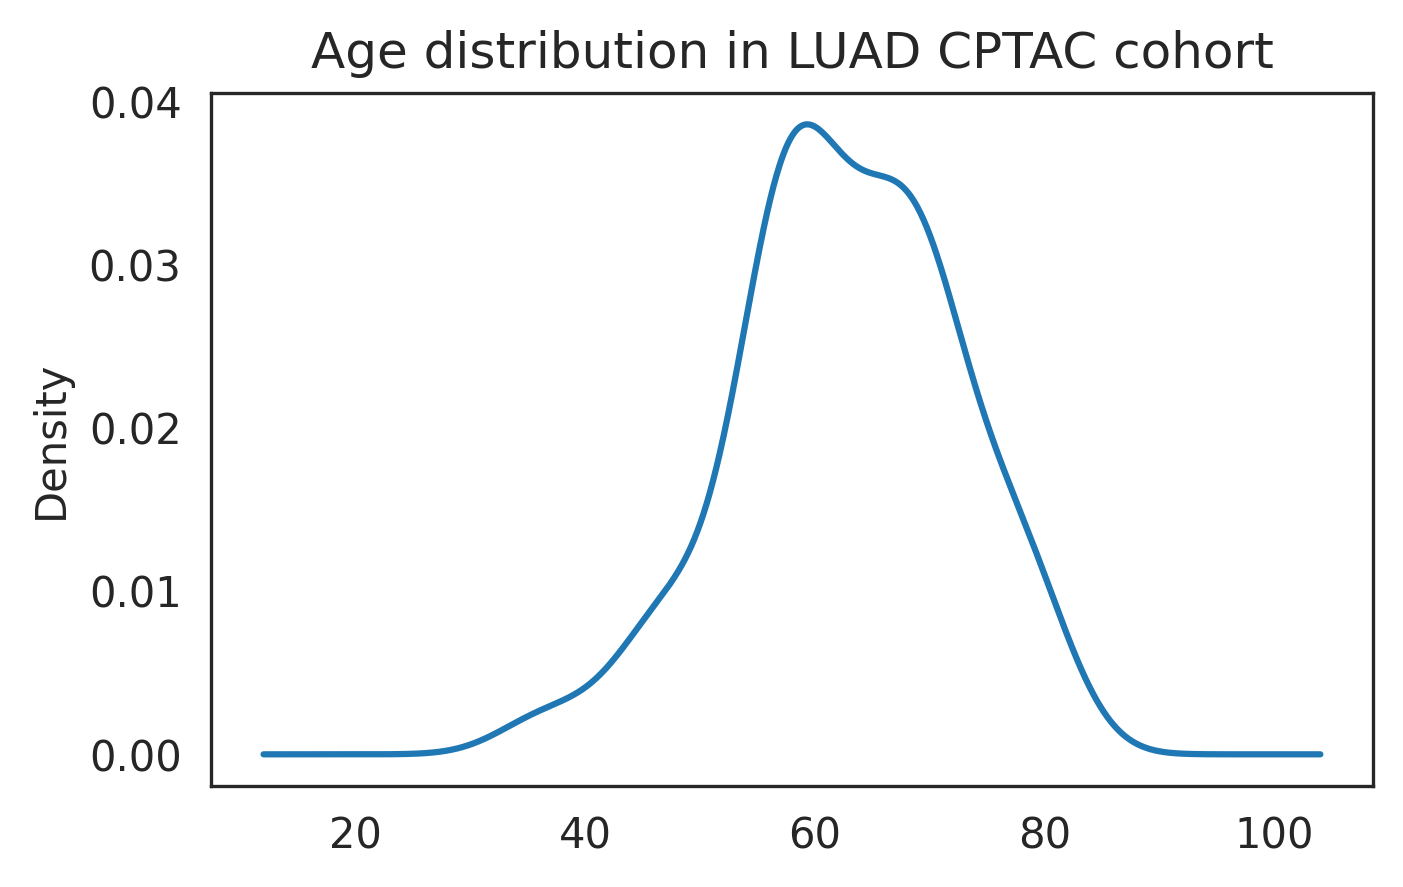

In [ ]:
patient_info_df["AGE"].plot(
    kind="kde", figsize=(5, 3), title="Age distribution in LUAD CPTAC cohort"
);

Several assumptions can be made from the graph, either patients of a certain age were selected in our cohort, or the probability of having oncological diseases increases with age.

### Ethnicity & Sex (20 points)

***Assess and visualize the ethnic and gender composition represented in a given cohort.***

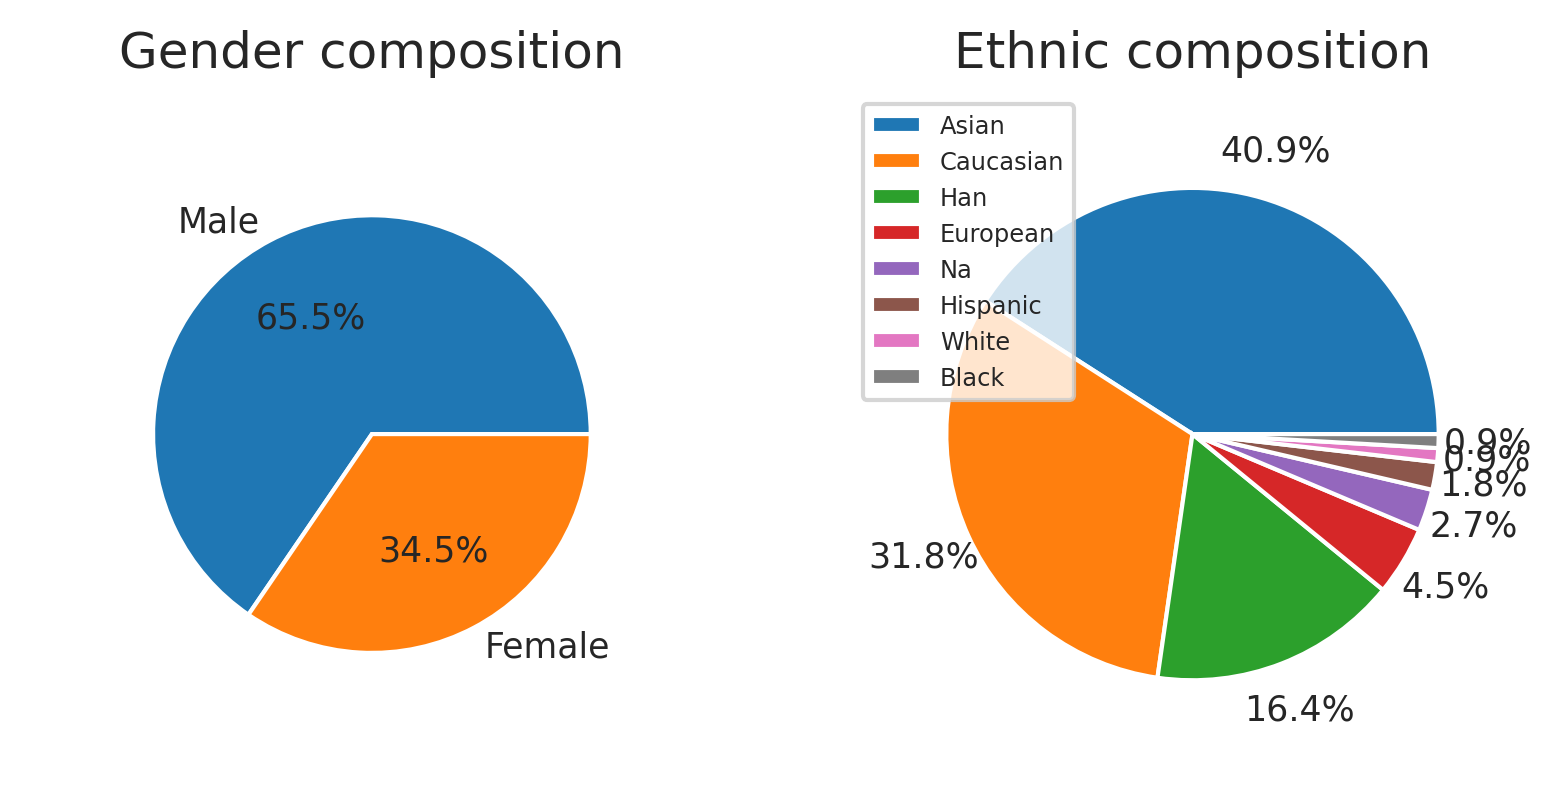

In [ ]:

sex = patient_info_df["SEX"].value_counts()
ethnicity = patient_info_df["ETHNICITY"].value_counts()

plt.figure(figsize=(10,10))

plt.subplot(131)
plt.pie(sex, labels=sex.index, autopct="%1.1f%%",textprops={'size': 'smaller'},radius = 0.8)
plt.gca().set_title('Gender composition')

plt.subplot(132)
plt.pie(ethnicity,autopct="%1.1f%%",pctdistance = 1.2,radius = 0.9,textprops={'size': 'smaller'})
plt.legend(ethnicity.index,loc='upper left',fontsize='xx-small')
plt.gca().set_title('Ethnic composition')

plt.show()

In [ ]:
mutations_df = pd.read_csv(
    "luad_cptac_2020/data_mutations.txt", sep="\t", index_col=None
)

mutations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31963 entries, 0 to 31962
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hugo_Symbol                  31963 non-null  object 
 1   NCBI_Build                   31963 non-null  object 
 2   Chromosome                   31963 non-null  object 
 3   Start_Position               31963 non-null  int64  
 4   End_Position                 31963 non-null  int64  
 5   Variant_Classification       31963 non-null  object 
 6   Variant_Type                 31963 non-null  object 
 7   Reference_Allele             31963 non-null  object 
 8   Tumor_Seq_Allele1            31963 non-null  object 
 9   Tumor_Seq_Allele2            31963 non-null  object 
 10  Tumor_Sample_Barcode         31963 non-null  object 
 11  Matched_Norm_Sample_Barcode  0 non-null      float64
 12  Match_Norm_Seq_Allele1       31963 non-null  object 
 13  Match_Norm_Seq_A

Ech row in this dataset contain information about one specific mutation.

  Crucial columns:

1.   Hugo_Symbol -> gene name
2.   Variant_Classification -> mutation type
3.   HGVSp_Short -> represents the protein change value
4.   t_depth
5.   t_alt_count

More information [here](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/)



In [ ]:
# number of mutations for each sample
mutations_df.Tumor_Sample_Barcode.value_counts()

C3L-00144    1799
C3N-00175    1390
C3N-00560    1367
C3N-00294    1287
C3N-02089    1113
             ... 
C3L-01683      18
C3L-02508      12
C3L-00422      11
C3L-00263       7
C3L-00083       1
Name: Tumor_Sample_Barcode, Length: 109, dtype: int64

### Most mutated gene in this cohort (10 points)



***In this task you should find the most mutated gene accros this cohort and describe it functions.***

Is it important for cancer development?

In [ ]:

mutations_df.Hugo_Symbol.value_counts()

TTN        92
RYR2       75
MUC16      72
CSMD3      61
USH2A      61
           ..
ABCC6       1
HES3        1
SPANXN4     1
DRC7        1
BUB3        1
Name: Hugo_Symbol, Length: 11675, dtype: int64

### ANSWER

Titin (TTN) is the most mutated gene in this cohort with a total of 92 rows dedicated to in dataset.

This gene encodes a large abundant protein of striated muscle. The product of this gene is divided into two regions, a N-terminal I-band and a C-terminal A-band. The A-band, which is thought to act as a protein-ruler, contains a mixture of immunoglobulin and fibronectin repeats, and possesses kinase activity. An N-terminal Z-disc region and a C-terminal M-line region bind to the Z-line and M-line of the sarcomere, respectively, so that a single titin molecule spans half the length of a sarcomere. Titin also contains binding sites for muscle associated proteins so it serves as an adhesion template for the assembly of contractile machinery in muscle cells.

Seems like it is not important in cancer development. TTN is involved in muscle cells functioning, but not in any type of cancer related pathways.



### VAF, Variant Allele Frequency (20 points)

VAF represents the percentage of tumor cells that harbor a specific mutation.

Which mutation is important?

Cancer is somewhat like an evolutionary process. Over time, cancer cells accumulate multiple mutations. This process can differ for each clone. So, how we can find truly driver event?

Variant allele frequency (referred to as raw VAF) of gene mutations is defined as the number of variant reads divided by the number of total reads, reported as a percentage.

In addition, VAF help us to distinct technical errors(occurred due to sample handling, library preparation, PCR enrichment, and sequencing) and real mutations.

VAF formula

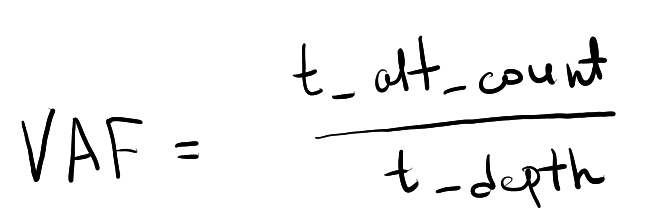

***Estimate VAF for each mutation in mutation_df.***

In [ ]:

mutations_df["VAF"] = mutations_df["t_alt_count"] / mutations_df["t_depth"]
mutations_df[["Hugo_Symbol","VAF"]]

,Hugo_Symbol,VAF
0,NBPF6,0.203390
1,PROK1,0.087774
2,UBAP2L,0.246032
3,PEAR1,0.093264
4,LMX1A,0.141463
...,...,...
31958,STK11,0.148241
31959,DCAF10,0.226415
31960,DCAF10,0.226415
31961,NR0B1,0.141538


### VAF filtration (10 points)

***Fillter all mutations with VAF < .5.***

Which gene are most mutated now?

In [ ]:

mut_filtrated_df = mutations_df[mutations_df["VAF"] > 0.5]
mut_filtrated_df.Hugo_Symbol.value_counts()

EGFR        7
MXRA5       6
TP53        5
WWP1        5
ADGRG4      5
           ..
FTCD        1
ARSF        1
DDX53       1
PPP4R3CP    1
TNKS        1
Name: Hugo_Symbol, Length: 785, dtype: int64

## EGFR is the most mutated gene now.

EGFR, a receptor tyrosine kinase, is altered by amplification and/or mutation in lung and brain cancers among others.

# Patient (30 points)

Let's analyze one patient -> **C3N-02572**.

**You'll need to find mutations in oncogenes ot tumor supressor genes. And think about what it can mean and what to influence.**

In [ ]:
"""

YOUR CODE HERE

"""
one_patient_df = mutations_df[mutations_df["Tumor_Sample_Barcode"] == "C3N-02572"]
#one_patient_df.info()
one_patient_df[["Hugo_Symbol", "NCBI_Build","Chromosome","Start_Position","Variant_Classification","Variant_Type","Reference_Allele",
                "Tumor_Seq_Allele1","Tumor_Seq_Allele2", "HGVSc","HGVSp","Transcript_ID","callers", "Gene", "Feature", "Feature_type", "Consequence","VAF"]].head()

,Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSc,HGVSp,Transcript_ID,callers,Gene,Feature,Feature_type,Consequence,VAF
18344,SLC35E2B,GRCh37,1,1606961,Missense_Mutation,SNP,T,T,C,c.527A>G,p.Lys176Arg,ENST00000617444,varscan-mutect,ENSG00000189339,ENST00000617444,Transcript,missense_variant,0.063291
18345,ERICH3,GRCh37,1,75112369,Missense_Mutation,SNP,A,A,C,c.225T>G,p.His75Gln,ENST00000326665,varscan-mutect,ENSG00000178965,ENST00000326665,Transcript,missense_variant,0.070423
18346,HMCN1,GRCh37,1,186113353,Missense_Mutation,SNP,G,G,C,c.13973G>C,p.Ser4658Thr,ENST00000271588,strelka-varscan-mutect,ENSG00000143341,ENST00000271588,Transcript,missense_variant,0.377358
18347,CHRM3,GRCh37,1,240071726,Missense_Mutation,SNP,G,G,T,c.975G>T,p.Glu325Asp,ENST00000255380,strelka-varscan,ENSG00000133019,ENST00000255380,Transcript,missense_variant,0.062992
18348,ROCK2,GRCh37,2,11355654,Nonsense_Mutation,SNP,G,G,A,c.1579C>T,p.Arg527Ter,ENST00000315872,varscan-mutect,ENSG00000134318,ENST00000315872,Transcript,stop_gained,0.072727


In [ ]:
one_patient_df["Hugo_Symbol"].value_counts()

TMPRSS11B    3
ABCA3        2
SLC35E2B     1
AMH          1
DCT          1
TUBGCP3      1
SYNE2        1
UNC13C       1
TP53         1
TRIM37       1
SPHK1        1
CELF4        1
FBN3         1
CRACR2A      1
MUC16        1
TRMT1        1
ZNF93        1
ACTN4        1
PPP1R16B     1
KCNQ2        1
GRAP2        1
EFCAB6       1
RB1          1
ACY3         1
ERICH3       1
OR5T3        1
HMCN1        1
CHRM3        1
ROCK2        1
ESPNL        1
LRRIQ4       1
C4orf50      1
UGT2B4       1
HACE1        1
FNDC1        1
ETV1         1
EGFR         1
TRRAP        1
TJP2         1
ABHD17B      1
SECISBP2     1
CCDC183      1
CACNA1B      1
EBLN1        1
ARHGAP21     1
FAM47C       1
Name: Hugo_Symbol, dtype: int64

###   Answer. The C3N-02572 patient has mutations in following TSGs or oncogenes:

*   Tumor supressor genes - TP53, RB1;
*   Oncogenes - ETV1, EGFR, TRRAP.





In [ ]:
one_patient_df.query("Hugo_Symbol == 'TP53' or Hugo_Symbol == 'RB1' or Hugo_Symbol == 'ETV1' or Hugo_Symbol == 'EGFR' or Hugo_Symbol == 'TRRAP'" )

,Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,...,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,VAF
18358,ETV1,GRCh37,7,13949261,13949261,Silent,SNP,G,G,A,...,ENSG00000006468,ENST00000430479,Transcript,synonymous_variant,1604/6740,936/1434,312/477,F,ttC/ttT,0.082645
18359,EGFR,GRCh37,7,55259515,55259515,Missense_Mutation,SNP,T,T,G,...,ENSG00000146648,ENST00000275493,Transcript,missense_variant,2750/9821,2573/3633,858/1210,L/R,cTg/cGg,0.368932
18360,TRRAP,GRCh37,7,98531002,98531002,Nonsense_Mutation,SNP,G,G,T,...,ENSG00000196367,ENST00000359863,Transcript,stop_gained,4200/12677,3991/11580,1331/3859,E/*,Gag/Tag,0.052980
18371,RB1,GRCh37,13,49050864,49050864,Nonsense_Mutation,SNP,C,C,T,...,ENSG00000139687,ENST00000267163,Transcript,stop_gained,2686/4840,2548/2787,850/928,Q/*,Cag/Tag,0.112500
18378,TP53,GRCh37,17,7577559,7577559,Missense_Mutation,SNP,G,G,A,...,ENSG00000141510,ENST00000269305,Transcript,missense_variant,912/2579,722/1182,241/393,S/F,tCc/tTc,0.330159


As can bee seen above 4 of 5 potential cancer genes have mutation that change the structure of the protein.

The TP53 S241F mutation is considered as likely oncogenic by the OncoKB data base (https://www.oncokb.org/gene/TP53/S241F) and could be found in various tumors.

The RB1 p.Gln850 mutation is nonsense mutation and is considered as likely oncogenic by the OncoKB data base (https://www.oncokb.org/gene/RB1/Truncating%20Mutations). It also occurs in lung cancer.

The EGFR L858R mutation is known to be oncogenic. (https://www.oncokb.org/gene/EGFR/L858R). EGFR is altered by amplification and/or mutation in lung and brain cancers among others.

TRRAP:c.3991G>T is considered to be the
variant of uncertain significance (https://franklin.genoox.com/clinical-db/variant/snp/chr7-98531002-G-T?app=acmg-classification) and i could not found any specific info about the mutation's connection to any type of cancer. But TRRAP may act as an oncogene. (https://www.omim.org/entry/603015?search=trrap&highlight=trrap)  

